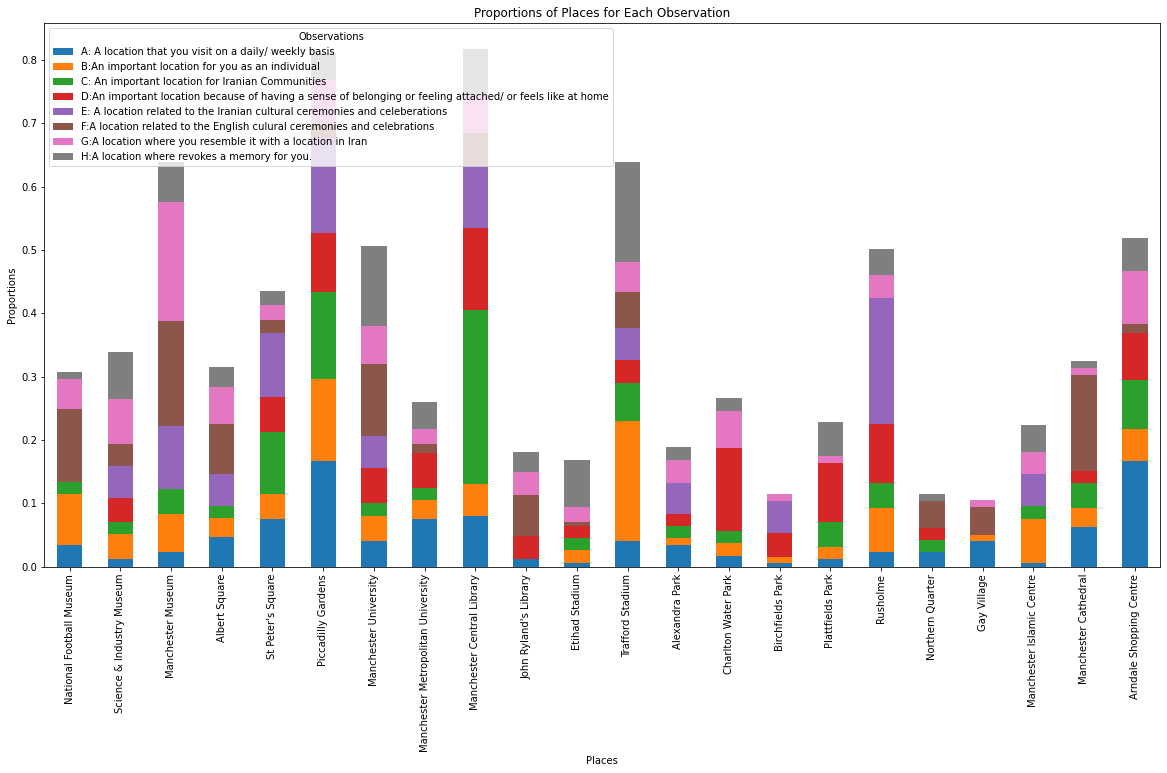

Chart saved to: /Users/farnazadmin/Downloads/result.png


In [3]:
#Codes used to get results of "Perceiving Place Through Practice: Iranian Immigrant Landscape Perceptions and Place-Making in Manchester"

#1: the stacked-bar Chart of Everyday Landscape Peceptions 

import os
import matplotlib.pyplot as plt
import pandas as pd

# Data provided
data = [
    [6, 2, 4, 8, 13, 29, 7, 13, 14, 2, 1, 7, 6, 3, 1, 2, 4, 4, 7, 1, 11, 29],  # A
    [8, 4, 6, 3, 4, 13, 4, 3, 5, 0, 2, 19, 1, 2, 1, 2, 7, 0, 1, 7, 3, 5],  # B
    [1, 1, 2, 1, 5, 7, 1, 1, 14, 0, 1, 3, 1, 1, 0, 2, 2, 1, 0, 1, 2, 4],   # C
    [0, 2, 0, 0, 3, 5, 3, 3, 7, 2, 1, 2, 1, 7, 2, 5, 5, 1, 0, 0, 1, 4],  # D
    [0, 1, 2, 1, 2, 3, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 4, 0, 0, 1, 0, 0],  # E
    [16, 5, 23, 11, 3, 3, 16, 2, 7, 9, 1, 8, 0, 0, 0, 0, 0, 6, 6, 0, 21, 2],  # F
    [4, 6, 16, 5, 2, 6, 5, 2, 5, 3, 2, 4, 3, 5, 1, 1, 3, 0, 1, 3, 1, 7],  # G
    [1, 7, 6, 3, 2, 4, 12, 4, 7, 3, 7, 15, 2, 2, 0, 5, 4, 1, 0, 4, 1, 5]   # H
]

# Convert the data into a pandas DataFrame
df = pd.DataFrame(
    data, 
    columns=["National Football Museum", "Science & Industry Museum", "Manchester Museum", 
             "Albert Square", "St Peter's Square", "Piccadilly Gardens",
             "Manchester University", "Manchester Metropolitan University",
             "Manchester Central Library", "John Ryland's Library",
             "Etihad Stadium", "Trafford Stadium", "Alexandra Park", 
             "Charlton Water Park", "Birchfields Park", "Plattfields Park",
             "Rusholme", "Northern Quarter", "Gay Village",
             "Manchester Islamic Centre", "Manchester Cathedral", "Arndale Shopping Centre"], 
    index=["A: A location that you visit on a daily/ weekly basis", 
           "B:An important location for you as an individual", 
           "C: An important location for Iranian Communities", 
           "D:An important location because of having a sense of belonging or feeling attached/ or feels like at home", 
           "E: A location related to the Iranian cultural ceremonies and celeberations", 
           "F:A location related to the English culural ceremonies and celebrations", 
           "G:A location where you resemble it with a location in Iran", 
           "H:A location where revokes a memory for you. "]
)

# Assuming you want to normalize the data (proportions) before plotting
df_proportions = df.div(df.sum(axis=1), axis=0)  # Normalize rows to sum to 1

# Plotting bar plots for each observation
ax = df_proportions.T.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title("Proportions of Places for Each Observation")
plt.xlabel("Places")
plt.ylabel("Proportions")
plt.legend(title="Observations", loc="upper left")
plt.xticks(rotation=90)

# Determine the path to the Downloads folder
downloads_folder = os.path.join(os.path.expanduser("~"), "Downloads")

# Full file path
file_path = os.path.join(downloads_folder, "result.png")

# Save the figure to the Downloads folder with high quality
plt.savefig(file_path, dpi=500, bbox_inches='tight')

# Optionally, display the plot as well
plt.show()

print(f"Chart saved to: {file_path}")

/Users/farnazadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


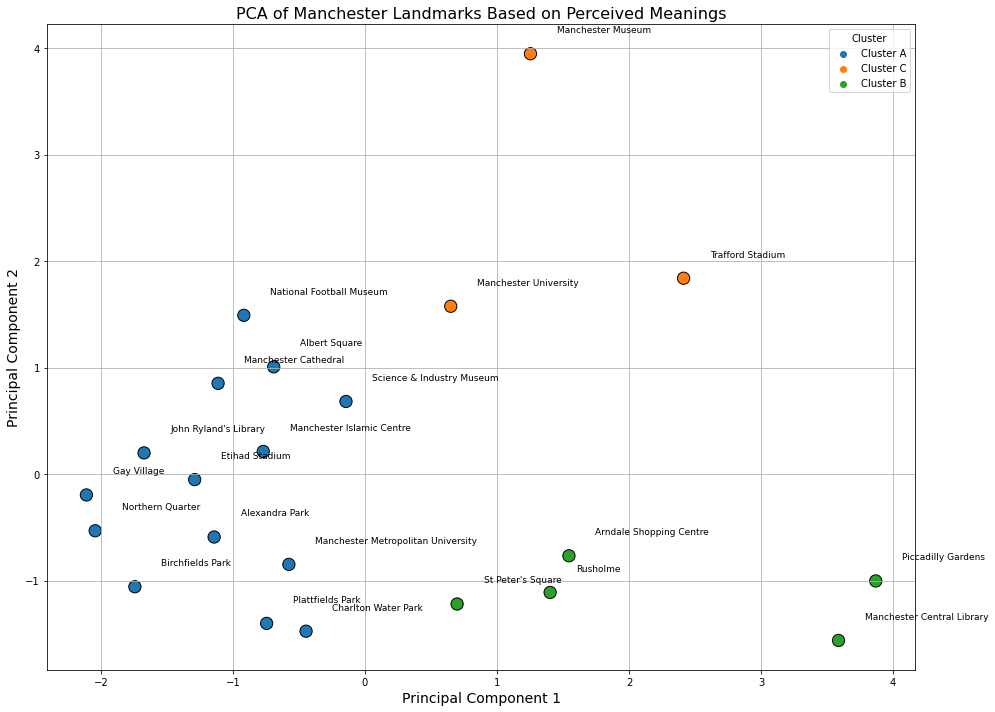

In [4]:
#2: The Principal Component Analysis for the Everyday Landscape Perceptions

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Provided data: 8 observations × 22 places
data = [
    [6, 2, 4, 8, 13, 29, 7, 13, 14, 2, 1, 7, 6, 3, 1, 2, 4, 4, 7, 1, 11, 29],  # A
    [8, 4, 6, 3, 4, 13, 4, 3, 5, 0, 2, 19, 1, 2, 1, 2, 7, 0, 1, 7, 3, 5],      # B
    [1, 1, 2, 1, 5, 7, 1, 1, 14, 0, 1, 3, 1, 1, 0, 2, 2, 1, 0, 1, 2, 4],       # C
    [0, 2, 0, 0, 3, 5, 3, 3, 7, 2, 1, 2, 1, 7, 2, 5, 5, 1, 0, 0, 1, 4],        # D
    [0, 1, 2, 1, 2, 3, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 4, 0, 0, 1, 0, 0],        # E
    [16, 5, 23, 11, 3, 3, 16, 2, 7, 9, 1, 8, 0, 0, 0, 0, 0, 6, 6, 0, 21, 2],   # F
    [4, 6, 16, 5, 2, 6, 5, 2, 5, 3, 2, 4, 3, 5, 1, 1, 3, 0, 1, 3, 1, 7],       # G
    [1, 7, 6, 3, 2, 4, 12, 4, 7, 3, 7, 15, 2, 2, 0, 5, 4, 1, 0, 4, 1, 5]       # H
]

# Landmark names (columns)
landmarks = [
    "National Football Museum", "Science & Industry Museum", "Manchester Museum", 
    "Albert Square", "St Peter's Square", "Piccadilly Gardens",
    "Manchester University", "Manchester Metropolitan University",
    "Manchester Central Library", "John Ryland's Library",
    "Etihad Stadium", "Trafford Stadium", "Alexandra Park", 
    "Charlton Water Park", "Birchfields Park", "Plattfields Park",
    "Rusholme", "Northern Quarter", "Gay Village",
    "Manchester Islamic Centre", "Manchester Cathedral", "Arndale Shopping Centre"
]

# Observation labels (index)
observations = [
    "A: Visited regularly", 
    "B: Personally important", 
    "C: Important for Iranian community", 
    "D: Sense of belonging",
    "E: Iranian cultural ceremonies", 
    "F: English cultural ceremonies", 
    "G: Resembles Iran", 
    "H: Revokes a memory"
]

# Step 1: Create original df (8x22)
df_raw = pd.DataFrame(data, index=observations, columns=landmarks)

# Step 2: Transpose to get (22 landmarks × 8 features)
df = df_raw.T

# Step 3: Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 4: PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Step 5: Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Step 6: Create result DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=df.index)
pca_df["Cluster"] = clusters

# Optional: Label clusters (you can update these based on interpretation)
cluster_labels = {
    0: "Cluster A",
    1: "Cluster B",
    2: "Cluster C"
}
pca_df["Cluster Label"] = pca_df["Cluster"].map(cluster_labels)

# Step 7: Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="Cluster Label",
    palette="tab10",
    s=150,
    edgecolor="black"
)

# Annotate landmarks
for i, txt in enumerate(pca_df.index):
    plt.text(pca_df.PC1[i]+0.2, pca_df.PC2[i]+0.2, txt, fontsize=9)

plt.title("PCA of Manchester Landmarks Based on Perceived Meanings", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

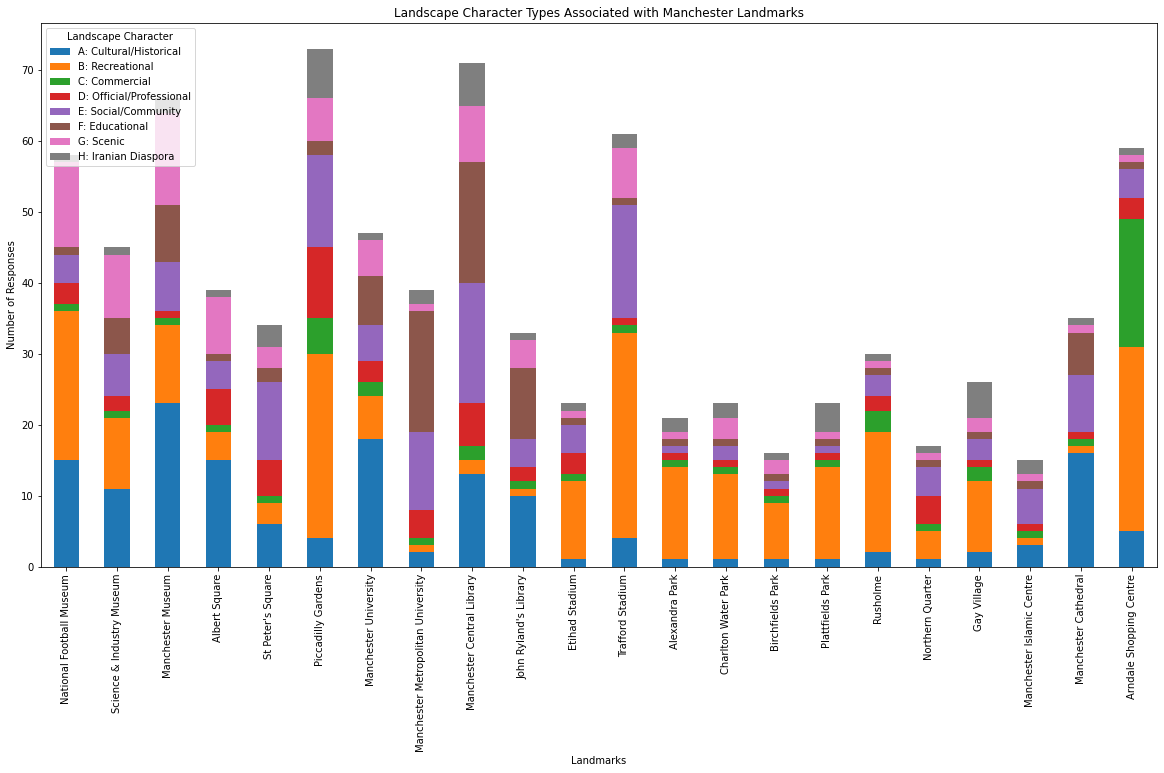

Chart saved to: /Users/farnazadmin/Downloads/Manchester_Landscape_StackedBar_AbsoluteCounts.png


In [15]:
#3: the stacked-bar Chart of Landscape Value Perceptions 

import os
import matplotlib.pyplot as plt
import pandas as pd

# Raw Data: 22 places × 8 features
data = [
    [15,21,1,3,4,1,12,1],
    [11,10,1,2,6,5,9,1],
    [23,11,1,1,7,8,13,2],
    [15,4,1,5,4,1,8,1],
    [6,3,1,5,11,2,3,3],
    [4,26,5,10,13,2,6,7],
    [18,6,2,3,5,7,5,1],
    [2,1,1,4,11,17,1,2],
    [13,2,2,6,17,17,8,6],
    [10,1,1,2,4,10,4,1],
    [1,11,1,3,4,1,1,1],
    [4,29,1,1,16,1,7,2],
    [1,13,1,1,1,1,1,2],
    [1,12,1,1,2,1,3,2],
    [1,8,1,1,1,1,2,1],
    [1,13,1,1,1,1,1,4],
    [2,17,3,2,3,1,1,1],
    [1,4,1,4,4,1,1,1],
    [2,10,2,1,3,1,2,5],
    [3,1,1,1,5,1,1,2],
    [16,1,1,1,8,6,1,1],
    [5,26,18,3,4,1,1,1]
]

features = [
    "A: Cultural/Historical", "B: Recreational", "C: Commercial", "D: Official/Professional",
    "E: Social/Community", "F: Educational", "G: Scenic", "H: Iranian Diaspora"
]

landmarks = [
    "National Football Museum", "Science & Industry Museum", "Manchester Museum", 
    "Albert Square", "St Peter's Square", "Piccadilly Gardens",
    "Manchester University", "Manchester Metropolitan University",
    "Manchester Central Library", "John Ryland's Library",
    "Etihad Stadium", "Trafford Stadium", "Alexandra Park", 
    "Charlton Water Park", "Birchfields Park", "Plattfields Park",
    "Rusholme", "Northern Quarter", "Gay Village",
    "Manchester Islamic Centre", "Manchester Cathedral", "Arndale Shopping Centre"
]

# Create DataFrame with absolute counts
df = pd.DataFrame(data, columns=features, index=landmarks)

# Plot stacked bar chart using raw values
ax = df.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title("Landscape Character Types Associated with Manchester Landmarks")
plt.xlabel("Landmarks")
plt.ylabel("Number of Responses")
plt.legend(title="Landscape Character", loc="upper left")
plt.xticks(rotation=90)

# Save figure
downloads_folder = os.path.join(os.path.expanduser("~"), "Downloads")
file_path = os.path.join(downloads_folder, "Manchester_Landscape_StackedBar_AbsoluteCounts.png")
plt.savefig(file_path, dpi=500, bbox_inches='tight')
plt.show()

print(f"Chart saved to: {file_path}")

/Users/farnazadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


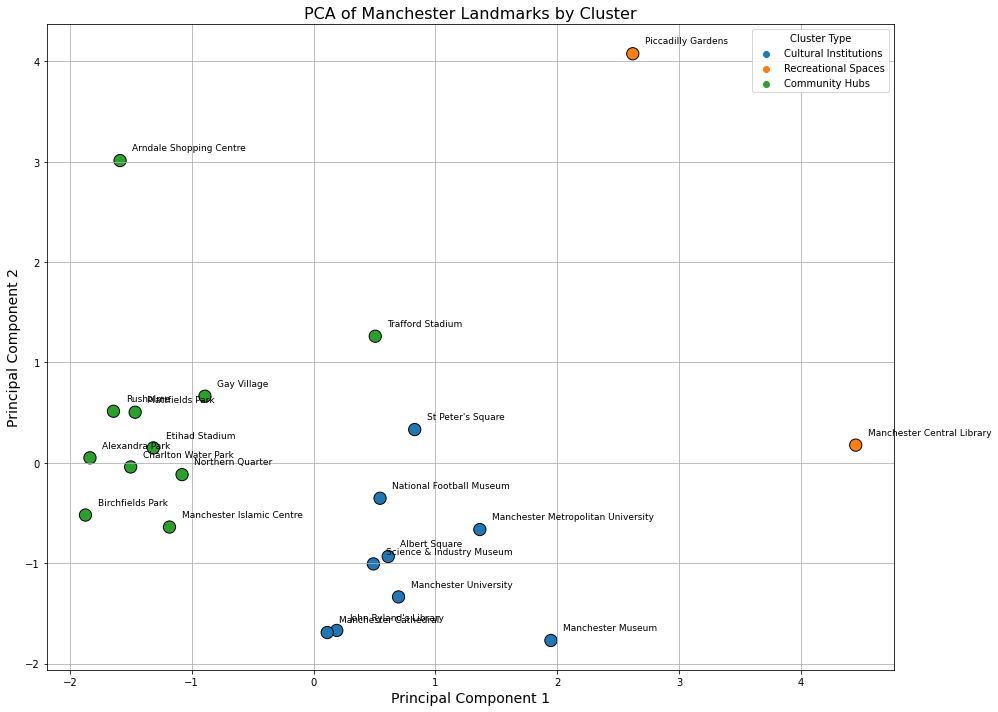

In [1]:
#4: The Principal Component Analysis for Landscape Value Perceptions (Figure 6 in the paper)
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data
data = [
    [15,21,1,3,4,1,12,1],
    [11,10,1,2,6,5,9,1],
    [23,11,1,1,7,8,13,2],
    [15,4,1,5,4,1,8,1],
    [6,3,1,5,11,2,3,3],
    [4,26,5,10,13,2,6,7],
    [18,6,2,3,5,7,5,1],
    [2,1,1,4,11,17,1,2],
    [13,2,2,6,17,17,8,6],
    [10,1,1,2,4,10,4,1],
    [1,11,1,3,4,1,1,1],
    [4,29,1,1,16,1,7,2],
    [1,13,1,1,1,1,1,2],
    [1,12,1,1,2,1,3,2],
    [1,8,1,1,1,1,2,1],
    [1,13,1,1,1,1,1,4],
    [2,17,3,2,3,1,1,1],
    [1,4,1,4,4,1,1,1],
    [2,10,2,1,3,1,2,5],
    [3,1,1,1,5,1,1,2],
    [16,1,1,1,8,6,1,1],
    [5,26,18,3,4,1,1,1]
]

features = [
    "A: Cultural/Historical", "B: Recreational", "C: Commercial", "D: Official/Professional",
    "E: Social/Community", "F: Educational", "G: Scenic", "H: Iranian Diaspora"
]

landmarks = [
    "National Football Museum", "Science & Industry Museum", "Manchester Museum", 
    "Albert Square", "St Peter's Square", "Piccadilly Gardens",
    "Manchester University", "Manchester Metropolitan University",
    "Manchester Central Library", "John Ryland's Library",
    "Etihad Stadium", "Trafford Stadium", "Alexandra Park", 
    "Charlton Water Park", "Birchfields Park", "Plattfields Park",
    "Rusholme", "Northern Quarter", "Gay Village",
    "Manchester Islamic Centre", "Manchester Cathedral", "Arndale Shopping Centre"
]

# 2. Create DataFrame
df = pd.DataFrame(data, columns=features, index=landmarks)

# 3. Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 4. PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# 5. Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# 6. Build DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=landmarks)
pca_df["Cluster"] = clusters

# Optional: map clusters to descriptions (can be changed based on interpretation)
cluster_name_map = {
    0: "Cultural Institutions",
    1: "Community Hubs",
    2: "Recreational Spaces",
   
}
pca_df["Cluster Name"] = pca_df["Cluster"].map(cluster_name_map)

# 7. Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Cluster Name",
    palette="tab10",
    s=150,
    edgecolor="black",
    marker='o'
)

# Annotate points
for i, txt in enumerate(pca_df.index):
    plt.text(pca_df.PC1[i]+0.1, pca_df.PC2[i]+0.1, txt, fontsize=9)

plt.title("PCA of Manchester Landmarks by Cluster", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.grid(True)
plt.legend(title="Cluster Type")
plt.tight_layout()
plt.show()

<Figure size 1296x720 with 0 Axes>

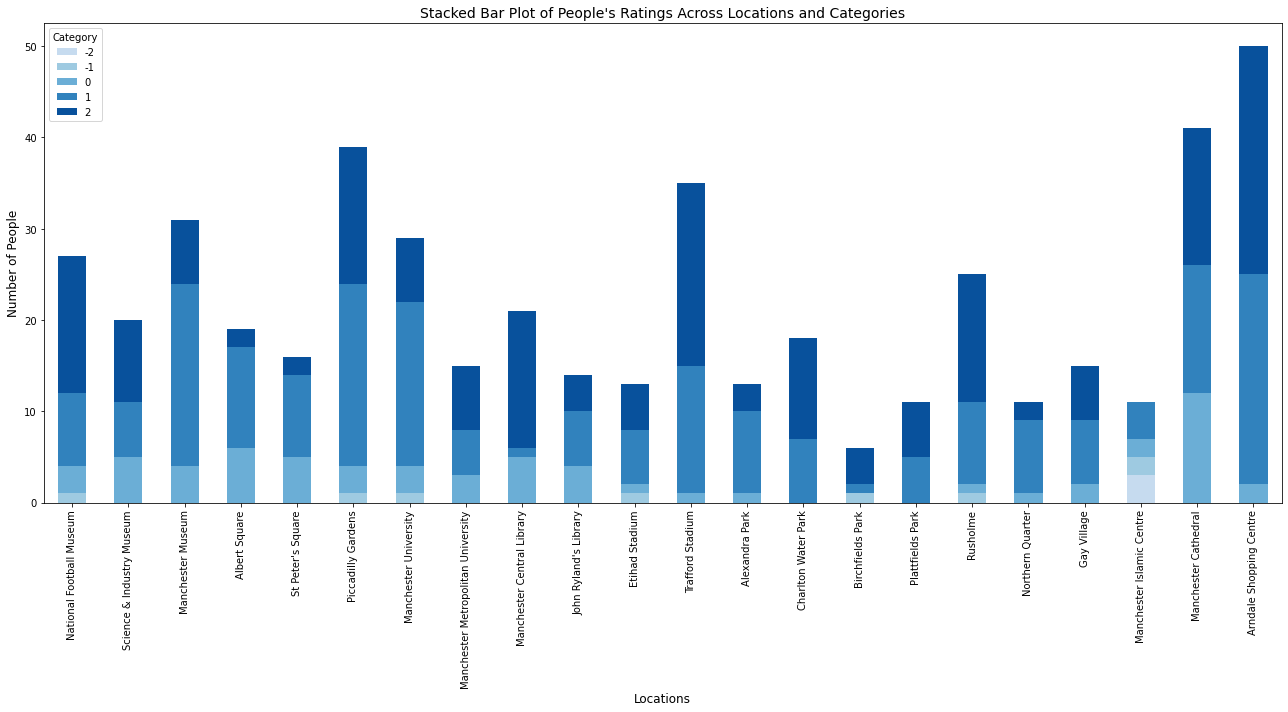

In [5]:
#5: The Bar chart Analysis for Value Sentiment Scores and Emotional Resonance

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare the Data
data = [
    [0, 1, 3, 8, 15],
    [0, 0, 5, 6, 9],
    [0, 0, 4, 20, 7],
    [0, 0, 6, 11, 2],
    [0, 0, 5, 9, 2],
    [0, 1, 3, 20, 15],
    [0, 1, 3, 18, 7],
    [0, 0, 3, 5, 7],
    [0, 0, 5, 1, 15],
    [0, 0, 4, 6, 4],
    [0, 1, 1, 6, 5],
    [0, 0, 1, 14, 20],
    [0, 0, 1, 9, 3],
    [0, 0, 0, 7, 11],
    [0, 1, 0, 1, 4],
    [0, 0, 0, 5, 6],
    [0, 1, 1, 9, 14],
    [0, 0, 1, 8, 2],
    [0, 0, 2, 7, 6],
    [3, 2, 2, 4, 0],
    [0, 0, 12, 14, 15],
    [0, 0, 2, 23, 25]
]

columns = ["-2", "-1", "0", "1", "2"]
landmarks = [
    "National Football Museum", "Science & Industry Museum", "Manchester Museum", 
    "Albert Square", "St Peter's Square", "Piccadilly Gardens", "Manchester University", 
    "Manchester Metropolitan University", "Manchester Central Library", "John Ryland's Library",
    "Etihad Stadium", "Trafford Stadium", "Alexandra Park", "Charlton Water Park", 
    "Birchfields Park", "Plattfields Park", "Rusholme", "Northern Quarter", 
    "Gay Village", "Manchester Islamic Centre", "Manchester Cathedral", "Arndale Shopping Centre"
]

# Step 2: Create DataFrame
df = pd.DataFrame(data, columns=columns, index=landmarks)

# Step 3: Plot
plt.figure(figsize=(18, 10))
df.plot(kind='bar', stacked=True, figsize=(18, 10), color=["#c6dbef", "#9ecae1", "#6baed6", "#3182bd", "#08519c"])

# Step 4: Customize
plt.title("Stacked Bar Plot of People's Ratings Across Locations and Categories", fontsize=14)
plt.xlabel("Locations", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Category")
plt.tight_layout()

# Step 5: Show
plt.show()


/Users/farnazadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


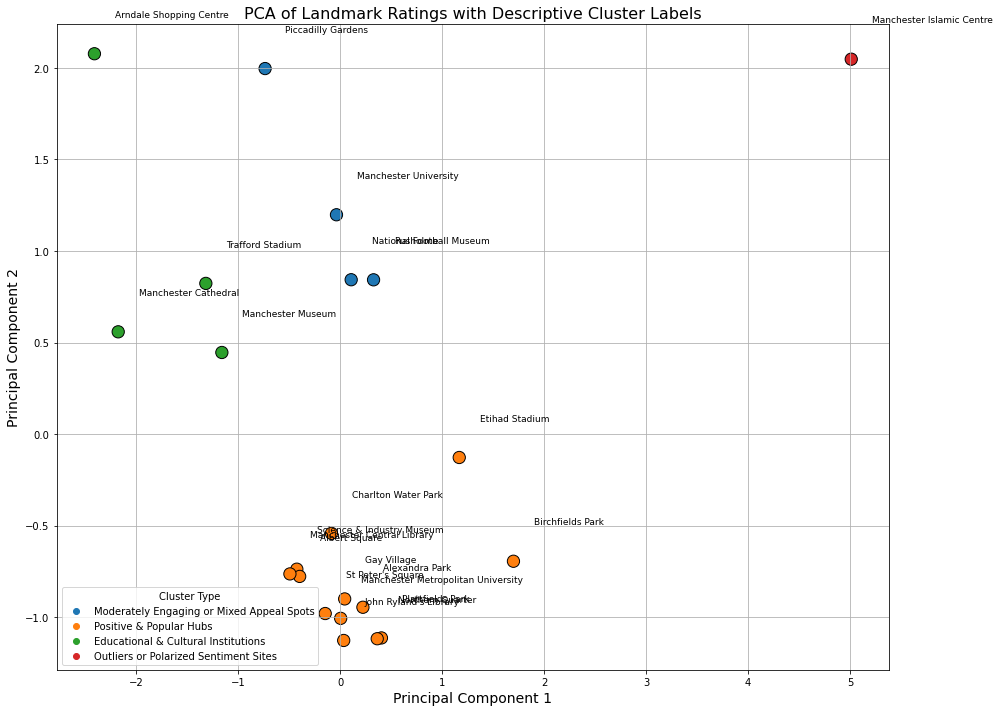

In [4]:
#6: The Principal Component Analysis for Value Sentiment Scores and Emotional Resonance 

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the Data
data = [
    [0, 1, 3, 8, 15],
    [0, 0, 5, 6, 9],
    [0, 0, 4, 20, 7],
    [0, 0, 6, 11, 2],
    [0, 0, 5, 9, 2],
    [0, 1, 3, 20, 15],
    [0, 1, 3, 18, 7],
    [0, 0, 3, 5, 7],
    [0, 0, 5, 1, 15],
    [0, 0, 4, 6, 4],
    [0, 1, 1, 6, 5],
    [0, 0, 1, 14, 20],
    [0, 0, 1, 9, 3],
    [0, 0, 0, 7, 11],
    [0, 1, 0, 1, 4],
    [0, 0, 0, 5, 6],
    [0, 1, 1, 9, 14],
    [0, 0, 1, 8, 2],
    [0, 0, 2, 7, 6],
    [3, 2, 2, 4, 0],
    [0, 0, 12, 14, 15],
    [0, 0, 2, 23, 25]
]

columns = ["-2", "-1", "0", "1", "2"]
landmarks = [
    "National Football Museum", "Science & Industry Museum", "Manchester Museum", 
    "Albert Square", "St Peter's Square", "Piccadilly Gardens", "Manchester University", 
    "Manchester Metropolitan University", "Manchester Central Library", "John Ryland's Library",
    "Etihad Stadium", "Trafford Stadium", "Alexandra Park", "Charlton Water Park", 
    "Birchfields Park", "Plattfields Park", "Rusholme", "Northern Quarter", 
    "Gay Village", "Manchester Islamic Centre", "Manchester Cathedral", "Arndale Shopping Centre"
]

# Step 2: Create DataFrame
df = pd.DataFrame(data, columns=columns, index=landmarks)

# Step 3: Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 4: PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Step 5: Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Step 6: Build DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=landmarks)
pca_df["Cluster"] = clusters

# Step 7: Map cluster numbers to descriptive labels
cluster_name_map = {
    0: "Moderately Engaging or Mixed Appeal Spots",
    1: "Positive & Popular Hubs",
    2: "Outliers or Polarized Sentiment Sites",
    3: "Educational & Cultural Institutions"
}
pca_df["Cluster Name"] = pca_df["Cluster"].map(cluster_name_map)

# Step 8: Final Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Cluster Name",
    palette="tab10",
    s=150,
    edgecolor="black"
)

# Annotate landmarks
for i, txt in enumerate(pca_df.index):
    plt.text(pca_df.PC1[i]+0.2, pca_df.PC2[i]+0.2, txt, fontsize=9)

plt.title("PCA of Landmark Ratings with Descriptive Cluster Labels", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.grid(True)
plt.legend(title="Cluster Type")
plt.tight_layout()
plt.show()